In [ ]:
#general purpose packages
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

#data processing
import re, string
#import emoji
import nltk

from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split


#Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

#transformers
!pip install transformers
from transformers import BertTokenizerFast
from transformers import TFBertModel
from transformers import RobertaTokenizerFast
from transformers import TFRobertaModel

#keras
import tensorflow as tf
from tensorflow import keras


#metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

#set seed for reproducibility
seed=42

#set style for plots
sns.set_style("whitegrid")
sns.despine()
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlepad=10)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 68.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.2 MB/s eta 0:00:00


<ipython-input-1-335695ed4efd>:45: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


<Figure size 640x480 with 0 Axes>

In [ ]:
df=pd.read_csv("/content/Bully_Dataset_Positive_Negative_Neutral.csv")

In [ ]:
df.head()

,ID,Output,Clean_coment
0,0,positive,nice video
1,1,neutral,the theme music is so nostalgic
2,2,positive,nice
3,3,positive,won team was super
4,4,neutral,only for dar


In [ ]:
def remove_stopwords(sentence):
    """
    Removes a list of stopwords

    Args:
        sentence (string): sentence to remove the stopwords from

    Returns:
        sentence (string): lowercase sentence without the stopwords
    """
    # List of stopwords
    stopwords = ["a", "about", "above", "after", "again", "ago","against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

    # Sentence converted to lowercase-only
    sentence = str(sentence).lower()

    words = sentence.split()
    no_words = [w for w in words if w not in stopwords]
    sentence = " ".join(no_words)

    return sentence

df['Clean_coment']=df['Clean_coment'].apply(lambda x:remove_stopwords(x))




In [ ]:

import nltk
from nltk.stem import WordNetLemmatizer

# Download WordNet from NLTK
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmi(sentence):


    # Tokenize the sentence into individual words
    words = nltk.word_tokenize(sentence)

    # Lemmatize each word to its base form
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    # Join the lemmatized words back into a sentence
    lemmatized_sentence = " ".join(lemmatized_words)

    # Print the original and lemmatized sentences

    return  lemmatized_sentence
df['Clean_coment']=df['Clean_coment'].apply(lambda x:lemmi(x))
df["Clean_coment"]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


0                                              nice video
1                                   theme music nostalgic
2                                                    nice
3                                          won team super
4                                                     dar
                              ...                        
3577    middle order will get dozen stepping t let s h...
3578    just first match series team play positive can...
3579                                  new graphic amazing
3580                 cricket team please fix middle order
3581    bad performance batting can expect defend low ...
Name: Clean_coment, Length: 3582, dtype: object

In [ ]:
MAX_LEN=128

# Categorical Data Visualisation by Bar chart

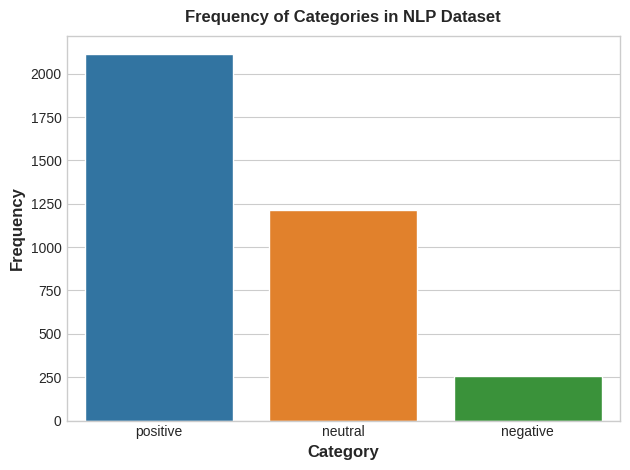

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Get the frequency of each category
category_counts = df['Output'].value_counts()

# Create a bar chart
sns.barplot(x=category_counts.index, y=category_counts.values)
#plt.pie(category_counts.index, category_counts.values)


# Add labels and title
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Frequency of Categories in NLP Dataset')

# Show the plot
plt.show()

# Categorical Data Visualisation by Tree map

In [ ]:
!pip install squarify
import pandas as pd
import matplotlib.pyplot as plt
import squarify

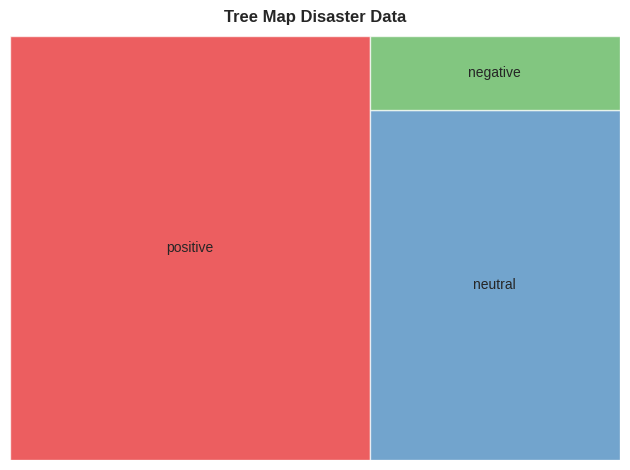

In [ ]:

# Assign a color to each category
colors = ['#e41a1c', '#377eb8', '#4daf4a']

# Create the tree map
squarify.plot(sizes=category_counts.values, label=category_counts.index, color=colors, alpha=.7)

# Add a title and remove the axis labels
plt.title('Tree Map Disaster Data')
plt.axis('off')

# Show the plot
plt.show()

# Visualization of Frequent Words

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


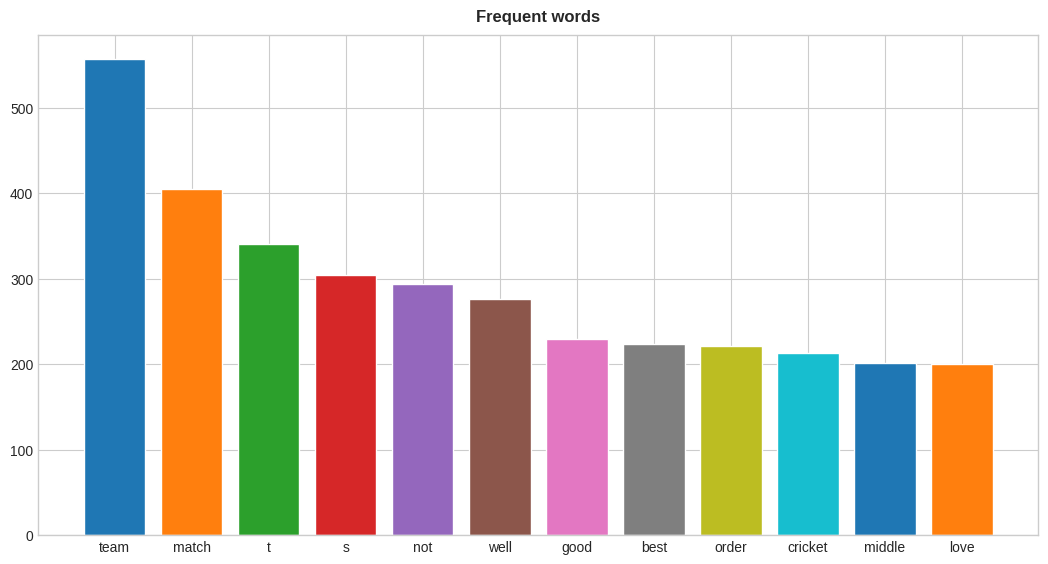

In [ ]:
import matplotlib.pyplot as plt
import nltk
from nltk.probability import FreqDist

# Tokenize the text into words
#Convert the text data into a single string using the join() method.

words = nltk.tokenize.word_tokenize(' '.join(df['Clean_coment'].tolist()))

# Create a frequency distribution of the words
freq_dist = FreqDist(words)

# Get the most common 10 words
most_common = freq_dist.most_common(12)
# Create a bar chart of the most common words with colors
fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes([0,0,1,1])
plt.title("Frequent words")
words = [word[0] for word in most_common]
frequency = [word[1] for word in most_common]
for i in range(len(words)):
    ax.bar(words[i], frequency[i])
plt.show()

# Word Cloud

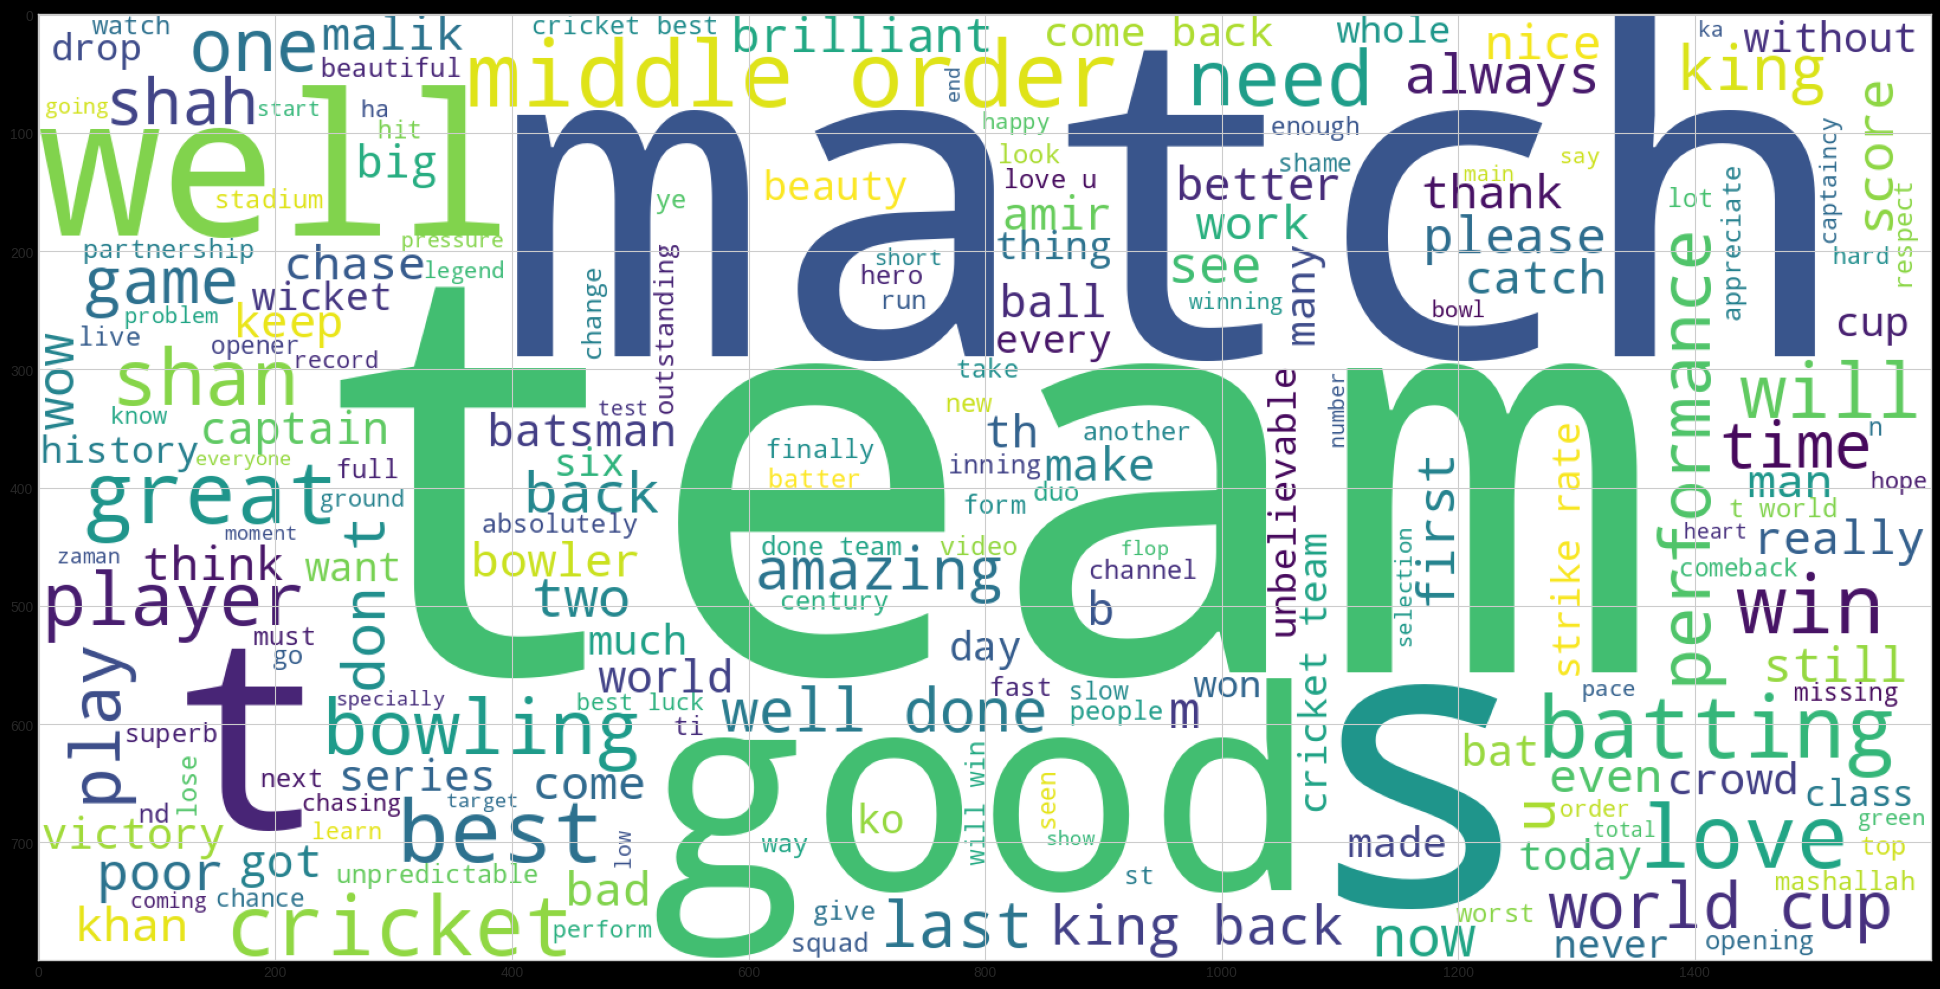

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(df['Clean_coment'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)


# **BERT**

In [ ]:
MAX_LEN=128

In [ ]:
def tokenize(data,max_len=MAX_LEN) :
    input_ids = []
    attention_masks = []
    for i in range(len(data)):
        encoded = tokenizer.encode_plus(
            data[i],
            add_special_tokens=True,
            max_length=MAX_LEN,
            padding='max_length',
            return_attention_mask=True
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids),np.array(attention_masks)

In [ ]:
def create_model(bert_model, max_len=MAX_LEN):

    ##params###
    opt = tf.keras.optimizers.Adam(learning_rate=1e-5, decay=1e-7)
    loss = tf.keras.losses.CategoricalCrossentropy()
    accuracy = tf.keras.metrics.CategoricalAccuracy()


    input_ids = tf.keras.Input(shape=(max_len,),dtype='int32')

    attention_masks = tf.keras.Input(shape=(max_len,),dtype='int32')

    embeddings = bert_model([input_ids,attention_masks])[1]

    output = tf.keras.layers.Dense(3, activation="softmax")(embeddings)

    model = tf.keras.models.Model(inputs = [input_ids,attention_masks], outputs = output)

    model.compile(opt, loss=loss, metrics=accuracy)


    return model

In [ ]:
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

In [ ]:
token_lens = []

for txt in df['Clean_coment'].values:
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens.append(len(tokens))

max_len=np.max(token_lens)
print(f"MAX TOKENIZED SENTENCE LENGTH: {max_len}")

MAX TOKENIZED SENTENCE LENGTH: 64


In [ ]:
token_lens = []

for i,txt in enumerate(df['Clean_coment'].values):
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens.append(len(tokens))
    if len(tokens)>80:
        print(f"INDEX: {i}, TEXT: {txt}")


In [ ]:
df['token_lens'] = token_lens

In [ ]:
df = df.sort_values(by='token_lens', ascending=False)
df.head(20)

,ID,Output,Clean_coment,token_lens
1475,1517,neutral,old orthodox style cricket even useless ten no...,64
409,431,neutral,well well every single match till date except ...,55
2598,2681,positive,brilliant knock t cricket talk target no optio...,51
176,188,neutral,amir please humble n consistent not indulge me...,50
1496,1538,negative,can not win without good middle order pathetic...,48
3484,3581,neutral,make play no pure opener yes got position dome...,47
3131,3223,positive,bowling world cup injured play foreign always ...,47
2990,3082,neutral,main problem approach even today no shot groun...,45
888,918,neutral,world s best th s appreciate already yet missi...,43
3147,3239,positive,c grade performance c grade team team going t ...,43


In [ ]:
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
#In this step we are Encoding Our target variable
import numpy as np
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Label=df['Output']
Label=np.array(Label).reshape(-1,1)


df['encoded_labels']=''
enc=le.fit_transform(Label)

df['encoded_labels']=enc
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,ID,Output,Clean_coment,token_lens,encoded_labels
0,3247,positive,need khan,4,2
1,1320,neutral,whata match yr,7,1
2,1164,positive,nice play,4,2
3,1012,neutral,need make like,5,1
4,1141,positive,well done love u,6,2


In [ ]:
ros = RandomOverSampler()
train_x, train_y = ros.fit_resample(np.array(df['Clean_coment']).reshape(-1, 1), np.array(df['Output']).reshape(-1, 1));
train_os = pd.DataFrame(list(zip([x[0] for x in train_x], train_y)), columns = ['Clean_coment', 'Output']);

In [ ]:
X = train_os['Clean_coment'].values
y = train_os['Output'].values

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, stratify=y, random_state=seed)

In [ ]:
new_index = pd.RangeIndex(len(X_train))
X_train = pd.Series(X_train, index=new_index)
train_input_ids, train_attention_masks = tokenize(X_train, MAX_LEN)
val_input_ids, val_attention_masks = tokenize(X_valid, MAX_LEN)
# test_input_ids, test_attention_masks = tokenize(X_test, MAX_LEN)

In [ ]:
y_train_le = y_train.copy()
y_valid_le = y_valid.copy()

In [ ]:
ohe = preprocessing.OneHotEncoder()
y_train = ohe.fit_transform(np.array(y_train).reshape(-1, 1)).toarray()
y_valid = ohe.fit_transform(np.array(y_valid).reshape(-1, 1)).toarray()

In [ ]:
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
def create_model(bert_model, max_len=MAX_LEN):

    ##params###
    import tensorflow.keras.backend as K
    opt = tf.keras.optimizers.Adam(learning_rate=1e-5)
    loss = tf.keras.losses.CategoricalCrossentropy()
   # accuracy = tf.keras.metrics.CategoricalAccuracy()
    class F1Score(tf.keras.metrics.Metric):
      def __init__(self, name='f1_score', **kwargs):
        super().__init__(name=name, **kwargs)
        self.precision = tf.keras.metrics.Precision()
        self.recall = tf.keras.metrics.Recall()

      def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

      def reset_states(self):
        self.precision.reset_states()
        self.recall.reset_states()

      def result(self):
        p = self.precision.result()
        r = self.recall.result()
        return 2 * ((p * r) / (p + r + K.epsilon()))
    METRICS = [
      tf.keras.metrics.CategoricalAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      F1Score(name='f1_score')]


    input_ids = tf.keras.Input(shape=(max_len,),dtype='int32')

    attention_masks = tf.keras.Input(shape=(max_len,),dtype='int32')

    embeddings = bert_model([input_ids,attention_masks])[1]

    output = tf.keras.layers.Dense(3, activation="softmax")(embeddings)

    model = tf.keras.models.Model(inputs = [input_ids,attention_masks], outputs = output)

    model.compile(opt, loss=loss, metrics=METRICS)


    return model

In [ ]:
model = create_model(bert_model, MAX_LEN)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['input_1[0][0]',                
                                thPoolingAndCrossAt               'input_2[0][0]']                
                                tentions(last_hidde                                               
                                n_state=(None, 128,                                           

In [ ]:
history_bert = model.fit([train_input_ids,train_attention_masks], y_train, validation_data=([val_input_ids,val_attention_masks], y_valid), epochs=20, batch_size=5)

Epoch 1/20
1014/1014 [==============================] - ETA: 0s - loss: 0.6292 - accuracy: 0.7249 - precision: 0.7848 - recall: 0.6446 - f1_score: 0.7078

/usr/local/lib/python3.10/dist-packages/keras/engine/training.py:2448: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


1014/1014 [==============================] - 229s 178ms/step - loss: 0.6292 - accuracy: 0.7249 - precision: 0.7848 - recall: 0.6446 - f1_score: 0.7078 - val_loss: 0.4227 - val_accuracy: 0.8375 - val_precision: 0.8462 - val_recall: 0.8068 - val_f1_score: 0.8260
Epoch 2/20
1014/1014 [==============================] - 174s 172ms/step - loss: 0.3092 - accuracy: 0.8759 - precision: 0.8820 - recall: 0.8688 - f1_score: 0.8753 - val_loss: 0.3438 - val_accuracy: 0.8754 - val_precision: 0.8789 - val_recall: 0.8644 - val_f1_score: 0.8716
Epoch 3/20
1014/1014 [==============================] - 173s 171ms/step - loss: 0.1971 - accuracy: 0.9230 - precision: 0.9264 - recall: 0.9219 - f1_score: 0.9241 - val_loss: 0.3094 - val_accuracy: 0.8959 - val_precision: 0.8970 - val_recall: 0.8927 - val_f1_score: 0.8949
Epoch 4/20
1014/1014 [==============================] - 173s 171ms/step - loss: 0.1352 - accuracy: 0.9481 - precision: 0.9499 - recall: 0.9467 - f1_score: 0.9483 - val_loss: 0.3900 - val_accuracy

# Line Plot for Model Training History

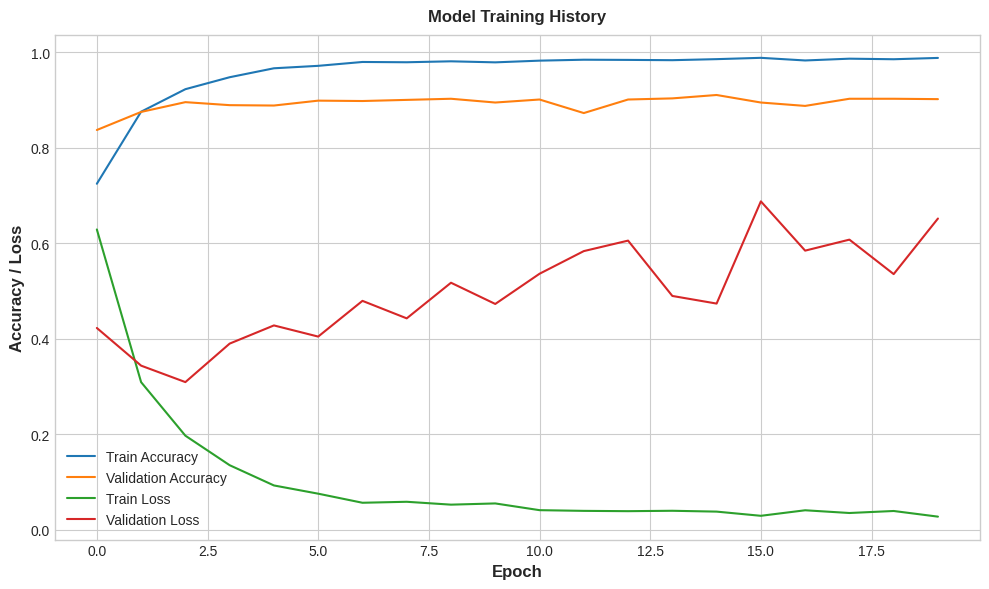

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history_bert.history['accuracy'], label='Train Accuracy')
plt.plot(history_bert.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history_bert.history['loss'], label='Train Loss')
plt.plot(history_bert.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy / Loss')
plt.title('Model Training History')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

# Assuming you have already trained your model and obtained the predictions for the validation set
y_pred = model.predict([val_input_ids, val_attention_masks])
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_valid, axis=1)

# Confusion Matrix
confusion_mat = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(confusion_mat)

# F1 Score
f1 = f1_score(y_true, y_pred_classes, average='weighted')
print("F1 Score:", f1)

# Precision
precision = precision_score(y_true, y_pred_classes, average='weighted')
print("Precision:", precision)

# Recall
recall = recall_score(y_true, y_pred_classes, average='weighted')
print("Recall:", recall)

# Accuracy
accuracy = accuracy_score(y_true, y_pred_classes)
print("Accuracy:", accuracy)


40/40 [==============================] - 15s 264ms/step
Confusion Matrix:
[[422   0   0]
 [ 13 383  27]
 [  8  76 339]]
F1 Score: 0.9011141597240939
Precision: 0.9043780375459403
Recall: 0.9022082018927445
Accuracy: 0.9022082018927445


In [ ]:
df["Output"].unique()

array(['positive', 'neutral', 'negative'], dtype=object)

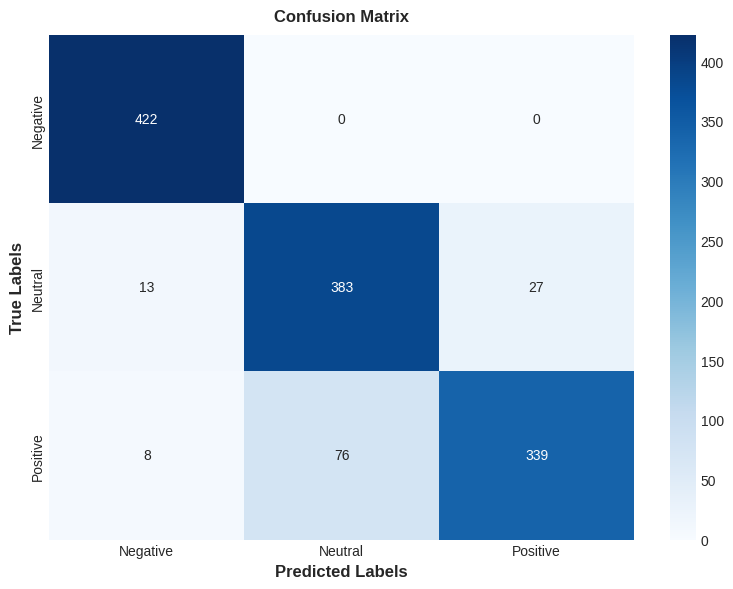

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(confusion_mat, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# Assuming you have already computed the confusion matrix
# Replace 'labels' with the list of your class labels, e.g., ['Class 1', 'Class 2', 'Class 3']
labels = ['Negative','Neutral', 'Positive']
plot_confusion_matrix(confusion_mat, labels)


# Testing


In [ ]:
# Load the new data and preprocess it
# Replace 'new_data' with the new text data you want to test
new_data = ["Good player", "Bad Player"]

# Preprocess the new data (remove stopwords and lemmatize)
new_data_processed = [remove_stopwords(lemmi(comment)) for comment in new_data]

# Tokenize the new data
new_input_ids, new_attention_masks = tokenize(new_data_processed, MAX_LEN)

# Make predictions using the trained model
new_predictions = model.predict([new_input_ids, new_attention_masks])

# Convert the predicted probabilities to class labels
new_pred_classes = np.argmax(new_predictions, axis=1)

# Replace 'labels' with the list of your class labels, e.g., ['Class 1', 'Class 2', 'Class 3']
labels = ['Negative','Neutral', 'Positive']

# Print the predictions for each new comment
for i, comment in enumerate(new_data):
    print(f"Comment: {comment}")
    print(f"Predicted Class: {labels[new_pred_classes[i]]}")
    print()  # Print a blank line for better readability between comments

1/1 [==============================] - 0s 91ms/step
Comment: Good player
Predicted Class: Positive

Comment: Bad Player
Predicted Class: Negative



# User Input

In [ ]:
# Function to preprocess user input
def preprocess_input(user_input):
    user_input_processed = remove_stopwords(lemmi(user_input))
    return user_input_processed

# Function to tokenize user input
def tokenize_user_input(user_input, max_len=MAX_LEN):
    user_input_processed = preprocess_input(user_input)
    input_ids, attention_masks = tokenize([user_input_processed], max_len)
    return input_ids, attention_masks

# Function to predict class label for user input
def predict_user_input_class(user_input):
    input_ids, attention_masks = tokenize_user_input(user_input)
    prediction = model.predict([input_ids, attention_masks])
    pred_class_idx = np.argmax(prediction, axis=1)[0]

    # Replace 'labels' with the list of your class labels, e.g., ['Class 1', 'Class 2', 'Class 3']
    labels = ['Negative','Neutral', 'Positive']
    pred_class = labels[pred_class_idx]

    return pred_class

# Take user input
user_input = input("Enter your comment: ")

# Predict class for user input
predicted_class = predict_user_input_class(user_input)

print(f"Predicted Class: {predicted_class}")


Enter your comment: Babar Azam is a bad player
1/1 [==============================] - 0s 77ms/step
Predicted Class: Negative


# **GRU**

 Encoded Label

In [ ]:
#In this step we are Encoding Our target variable
import numpy as np
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Label=df['Output']
Label=np.array(Label).reshape(-1,1)


df['encoded_labels']=''
enc=le.fit_transform(Label)

df['encoded_labels']=enc
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,ID,Output,Clean_coment,encoded_labels
0,0,positive,nice video,2
1,1,neutral,theme music nostalgic,1
2,2,positive,nice,2
3,3,positive,won team super,2
4,4,neutral,dar,1


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['ID'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['encoded_labels'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_2, *['ID'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_3, *['encoded_labels'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_4, *['Output'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_5, *['Clean_coment'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_6, *[[['ID', 'encoded_labels']]], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_7, *['Output', 'Clean_coment'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_8, *['ID', 'Output'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_9, *['ID', 'Clean_coment'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_10, *['encoded_labels', 'Output'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_11, *['encoded_labels', 'Clean_coment'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_12, *['ID', 'encoded_labels', 'Output'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_13, *['ID', 'encoded_labels', 'Clean_coment'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_14, *['ID', 'count()', 'Output'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_15, *['ID', 'count()', 'Clean_coment'], **{})
chart

# Tokenization

In [ ]:
# Parameters

vocab_size = 100000
max_length = 120
embedding_dim = 16
trunc_type='post'
oov_tok = "<OOV>"

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)

# Generate the word index dictionary for the training sentences
tokenizer.fit_on_texts(df["Clean_coment"])
word_index = tokenizer.word_index

# Generate and pad the training sequences
sequences = tokenizer.texts_to_sequences(df["Clean_coment"])
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

In [ ]:
from sklearn.model_selection import train_test_split
#Splitting into Train, Test and Validation Data
X_train, X_test, y_train, y_test = train_test_split(padded, df["encoded_labels"], test_size=0.2, random_state=500)

In [ ]:
#Preparitng our target Variables for the model accordingly
from tensorflow.keras.utils import to_categorical
#from keras.utils import to_categorical cause error use keras with tensorflow

y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

In [ ]:
import tensorflow as tf

# Build the model
model_one = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(256, return_sequences=True)),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(3, activation='softmax')
])


In [ ]:
import tensorflow.keras.backend as K

class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super().__init__(name=name, **kwargs)
        self.precision = tf.keras.metrics.Precision()
        self.recall = tf.keras.metrics.Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def reset_states(self):
        self.precision.reset_states()
        self.recall.reset_states()

    def result(self):
        p = self.precision.result()
        r = self.recall.result()
        return 2 * ((p * r) / (p + r + K.epsilon()))
METRICS = [
      tf.keras.metrics.CategoricalAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      F1Score(name='f1_score')
]
model_one.compile(optimizer='adam',loss='categorical_crossentropy',metrics=METRICS)

# Print the model summary
model_one.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 16)           1600000   
                                                                 
 bidirectional_1 (Bidirectio  (None, 120, 512)         420864    
 nal)                                                            
                                                                 
 global_average_pooling1d_1   (None, 512)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 64)                32832     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 3)                

In [ ]:
history_one=model_one.fit(X_train,y_train,epochs=20,batch_size=4)

Epoch 1/20
717/717 [==============================] - 41s 32ms/step - loss: 0.8976 - accuracy: 0.5770 - precision: 0.5876 - recall: 0.4660 - f1_score: 0.5198
Epoch 2/20
 13/717 [..............................] - ETA: 10s - loss: 0.8231 - accuracy: 0.5962 - precision: 0.5962 - recall: 0.5962 - f1_score: 0.5962

/usr/local/lib/python3.10/dist-packages/keras/engine/training.py:2448: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


717/717 [==============================] - 12s 17ms/step - loss: 0.7345 - accuracy: 0.6726 - precision: 0.7415 - recall: 0.5525 - f1_score: 0.6332
Epoch 3/20
717/717 [==============================] - 12s 17ms/step - loss: 0.6230 - accuracy: 0.7574 - precision: 0.7800 - recall: 0.7005 - f1_score: 0.7381
Epoch 4/20
717/717 [==============================] - 11s 16ms/step - loss: 0.5461 - accuracy: 0.7916 - precision: 0.8126 - recall: 0.7613 - f1_score: 0.7861
Epoch 5/20
717/717 [==============================] - 11s 16ms/step - loss: 0.4745 - accuracy: 0.8157 - precision: 0.8263 - recall: 0.7986 - f1_score: 0.8122
Epoch 6/20
717/717 [==============================] - 11s 15ms/step - loss: 0.4097 - accuracy: 0.8325 - precision: 0.8526 - recall: 0.8098 - f1_score: 0.8306
Epoch 7/20
717/717 [==============================] - 12s 17ms/step - loss: 0.3386 - accuracy: 0.8653 - precision: 0.8786 - recall: 0.8464 - f1_score: 0.8622
Epoch 8/20
717/717 [==============================] - 12s 16ms/

In [ ]:
prediction_one=model_one.evaluate(X_test,y_test)

23/23 [==============================] - 2s 14ms/step - loss: 1.8466 - accuracy: 0.7001 - precision: 0.7011 - recall: 0.7001 - f1_score: 0.7006


# LSTM

In [ ]:
import tensorflow as tf

# Build the model
model_two = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True)),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(3, activation='softmax')
])


In [ ]:
import tensorflow.keras.backend as K

class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super().__init__(name=name, **kwargs)
        self.precision = tf.keras.metrics.Precision()
        self.recall = tf.keras.metrics.Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def reset_states(self):
        self.precision.reset_states()
        self.recall.reset_states()

    def result(self):
        p = self.precision.result()
        r = self.recall.result()
        return 2 * ((p * r) / (p + r + K.epsilon()))
METRICS = [
      tf.keras.metrics.CategoricalAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      F1Score(name='f1_score')
]
model_two.compile(optimizer='adam',loss='categorical_crossentropy',metrics=METRICS)

# Print the model summary
model_two.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 120, 16)           1600000   
                                                                 
 bidirectional_3 (Bidirectio  (None, 120, 512)         559104    
 nal)                                                            
                                                                 
 global_average_pooling1d_3   (None, 512)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_6 (Dense)             (None, 64)                32832     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 3)                

In [ ]:
history_2=model_two.fit(X_train,y_train,epochs=20,batch_size=4,validation_data=(X_test,y_test))

Epoch 1/20
717/717 [==============================] - 33s 37ms/step - loss: 0.8967 - accuracy: 0.5787 - precision: 0.5758 - recall: 0.4534 - f1_score: 0.5073 - val_loss: 0.8560 - val_accuracy: 0.5955 - val_precision: 0.5955 - val_recall: 0.5955 - val_f1_score: 0.5955
Epoch 2/20
717/717 [==============================] - 13s 18ms/step - loss: 0.8878 - accuracy: 0.5888 - precision: 0.6021 - recall: 0.4859 - f1_score: 0.5378 - val_loss: 0.8557 - val_accuracy: 0.5955 - val_precision: 0.6009 - val_recall: 0.5649 - val_f1_score: 0.5823
Epoch 3/20
717/717 [==============================] - 13s 18ms/step - loss: 0.8329 - accuracy: 0.6098 - precision: 0.6304 - recall: 0.5442 - f1_score: 0.5841 - val_loss: 0.8254 - val_accuracy: 0.6025 - val_precision: 0.6219 - val_recall: 0.5551 - val_f1_score: 0.5866
Epoch 4/20
717/717 [==============================] - 14s 20ms/step - loss: 0.8004 - accuracy: 0.6307 - precision: 0.6695 - recall: 0.5211 - f1_score: 0.5861 - val_loss: 0.8767 - val_accuracy: 0.6

In [ ]:
prediction_two=model_two.evaluate(X_test,y_test)

23/23 [==============================] - 0s 16ms/step - loss: 1.1448 - accuracy: 0.7001 - precision: 0.6993 - recall: 0.6974 - f1_score: 0.6983


## Comparision OF MODEL On Test Data Performance

**ACCURACY**

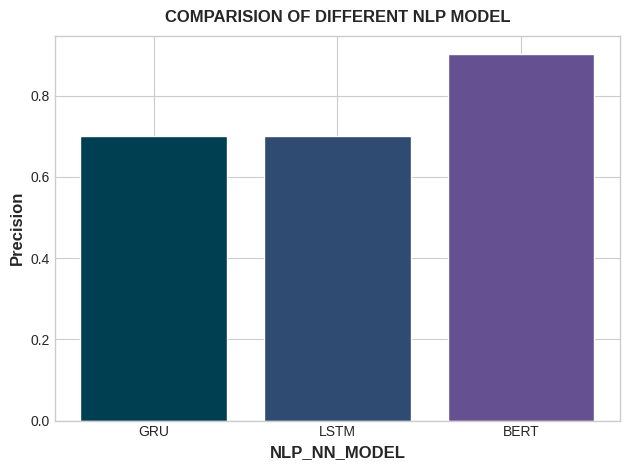

In [ ]:
import matplotlib.pyplot as plt

# Data to plot
x = ['GRU', 'LSTM', 'BERT']
y = [0.7001,0.7001, 0.9022]

# Set the colors for the bars
colors = ['#003f51', '#2f4b71', '#655191']

# Create a bar chart
plt.bar(x, y, color=colors)

# Add labels and title
plt.xlabel("NLP_NN_MODEL")
plt.ylabel("Precision")
plt.title("COMPARISION OF DIFFERENT NLP MODEL")

# Show the plot
plt.show()

**RECALL**

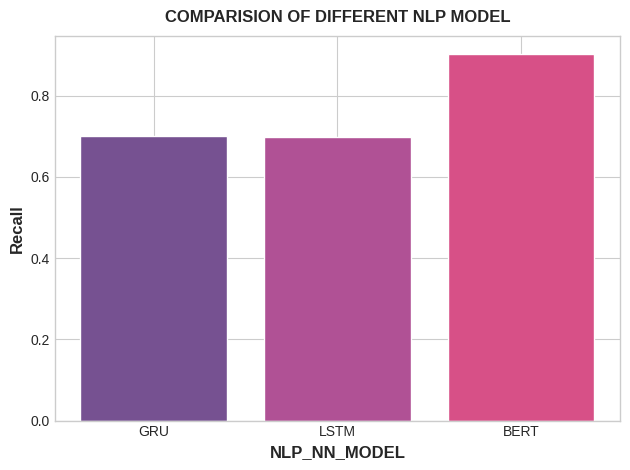

In [ ]:
import matplotlib.pyplot as plt

# Data to plot
x = ['GRU', 'LSTM', 'BERT']
y = [0.7001, 0.6974, 0.9022]

# Set the colors for the bars
colors = ['#765191', '#b05195', '#d75087']

# Create a bar chart
plt.bar(x, y, color=colors)

# Add labels and title
plt.xlabel("NLP_NN_MODEL")
plt.ylabel("Recall")
plt.title("COMPARISION OF DIFFERENT NLP MODEL")

# Show the plot
plt.show()

**PRECISION**

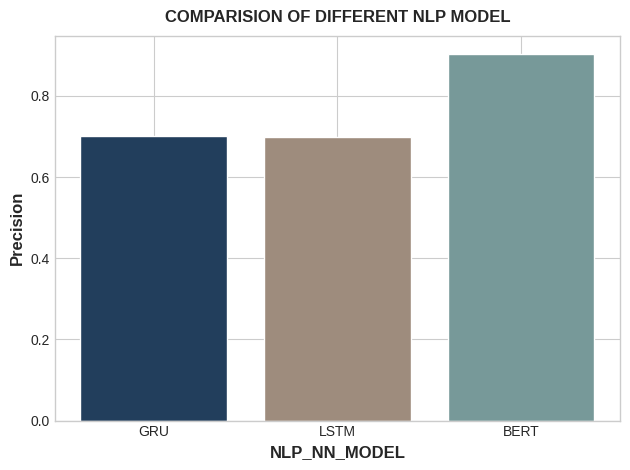

In [ ]:
import matplotlib.pyplot as plt

# Data to plot
x = ['GRU', 'LSTM', 'BERT']
y = [0.7011,0.6993, 0.9029]

# Set the colors for the bars
colors = ['#223e5c', '#9e8c7d', '#779999']

# Create a bar chart
plt.bar(x, y, color=colors)

# Add labels and title
plt.xlabel("NLP_NN_MODEL")
plt.ylabel("Precision")
plt.title("COMPARISION OF DIFFERENT NLP MODEL")

# Show the plot
plt.show()

**F1-SCORE**

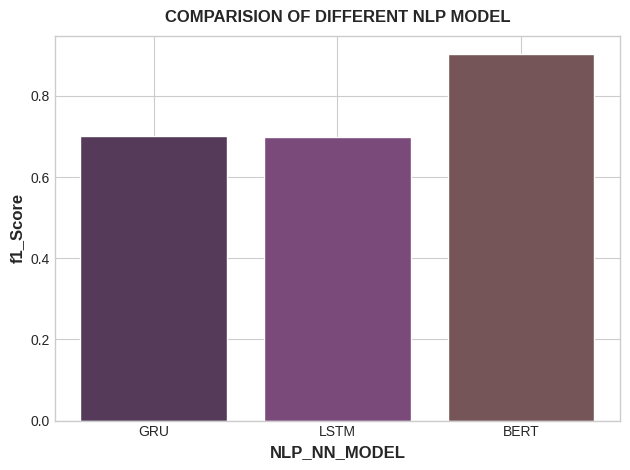

In [ ]:
import matplotlib.pyplot as plt

# Data to plot
x = ['GRU', 'LSTM', 'BERT']
y = [0.7006, 0.6983,0.9026]

# Set the colors for the bars
colors = ['#553a5a', '#7a4a7a', '#755557']

# Create a bar chart
plt.bar(x, y, color=colors)

# Add labels and title
plt.xlabel("NLP_NN_MODEL")
plt.ylabel("f1_Score")
plt.title("COMPARISION OF DIFFERENT NLP MODEL")

# Show the plot
plt.show()

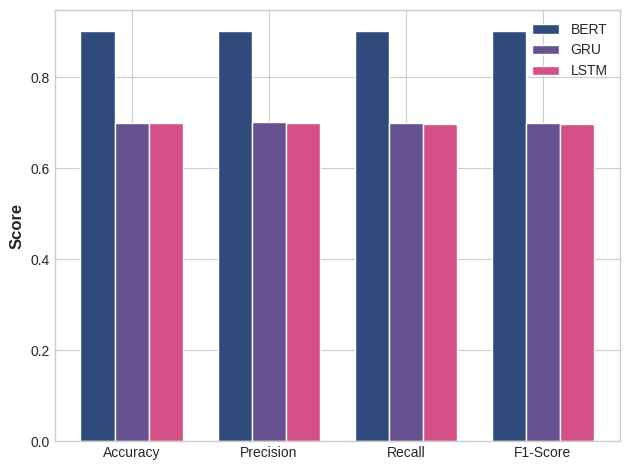

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the precision, recall, F1 score, and accuracy for each model
lstm=[0.7001, 0.6993, 0.6974, 0.6983 ]
gru=[0.7001 ,0.7011, 0.7001, 0.7006]
bert=[0.9022 , 0.9029, 0.9022, 0.9026]

# Set up the bar chart
labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(labels))
width = 0.25
colors = ['#003f5c', '#2f4b7c', '#665191']
fig, ax = plt.subplots()
rects1 = ax.bar(x - width, bert, width, label='BERT',color='#2f4b7c')
rects2 = ax.bar(x, gru, width, label='GRU',color='#665191')
rects3 = ax.bar(x + width, lstm, width, label='LSTM',color='#d45087')

# Add labels, title, and legend to the plot
ax.set_ylabel('Score')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Set the plot style
plt.style.use('ggplot')

# Show the plot
plt.show()
